In [ ]:
# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [ ]:
conda install -c conda-forge plotnine

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN



from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



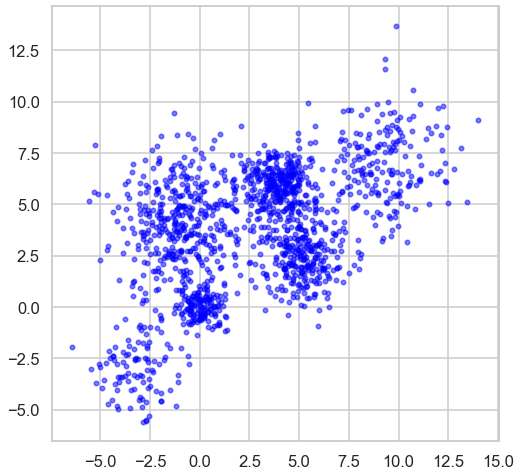

In [6]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [7]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [8]:
 features, true_labels = make_blobs(
   ...:     n_samples=[100,150, 300, 400,300, 200],
   ...:     centers=[(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)],
   ...:     cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
   ...:     random_state=42
   ...: )

In [9]:
features[:5]

array([[-4.24577466e-01,  3.49781760e+00],
       [ 3.68136336e+00,  5.48375840e+00],
       [ 9.55729599e+00,  8.57125924e+00],
       [ 9.01414231e-01,  4.44568683e-02],
       [ 3.14621983e-03,  2.81883563e-02]])

In [10]:
true_labels[:5]

array([3, 4, 5, 1, 1])

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(blob_array)


In [12]:
scaled_features[:5]

array([[-1.26719967, -2.24928146],
       [-1.2175423 , -1.5406789 ],
       [-1.50759118, -2.29017465],
       [-0.91115226, -1.86296778],
       [-1.58499121, -1.95888504]])

In [13]:
kmeans = KMeans(
       init="random",
       n_clusters=6,
        n_init=10,
       max_iter=300,
      random_state=42
)

In [14]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [15]:
kmeans.inertia_

367.40124057423736

In [16]:
kmeans.cluster_centers_

array([[-0.9790114 ,  0.32086847],
       [ 0.31718045,  0.73821759],
       [-0.74794249, -1.03471934],
       [ 1.70012407,  1.12366212],
       [ 0.63517879, -0.43350959],
       [-1.47555009, -2.20876864]])

In [17]:
kmeans.n_iter_

25

In [18]:
kmeans.labels_[:5]

array([5, 2, 5, 5, 5])

In [19]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

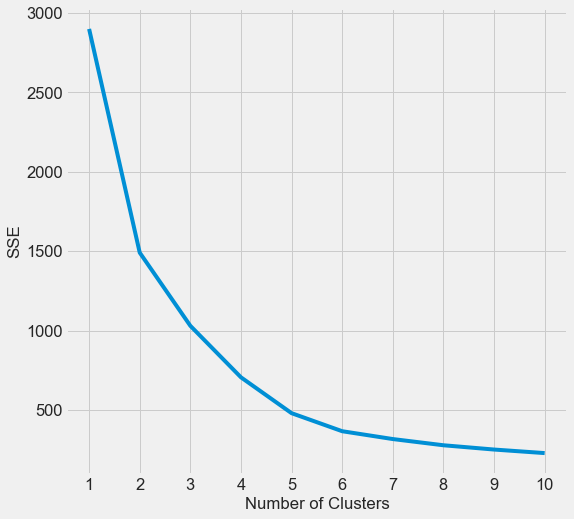

In [20]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

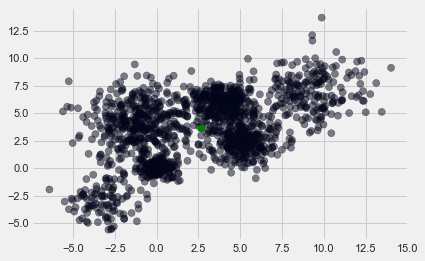

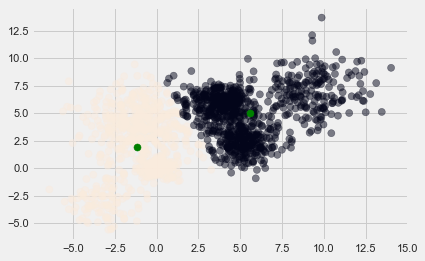

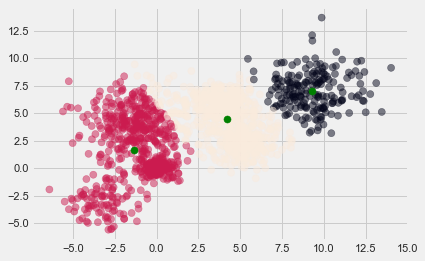

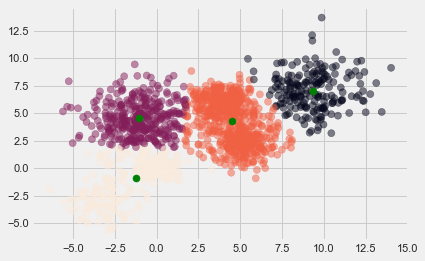

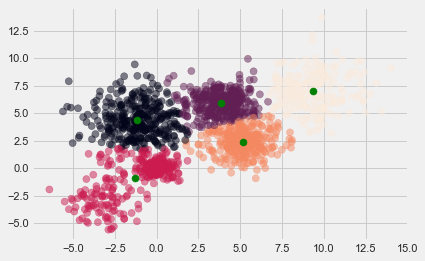

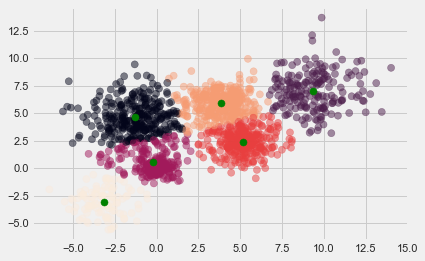

In [63]:
df = pd.DataFrame(blob_array)
array = [1,2,3,4,5,6]
for i in array:
    kmeans = KMeans(n_clusters=i).fit(df)
    centroids = kmeans.cluster_centers_
    plt.scatter(df[0], df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
    plt.show()

In [59]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

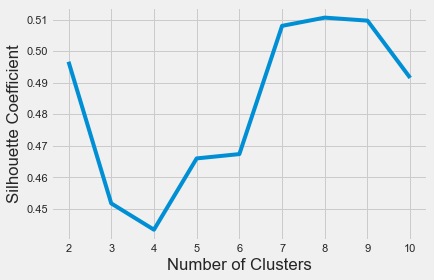

In [60]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(2, 11), silhouette_coefficients)
 plt.xticks(range(2, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("Silhouette Coefficient")
 plt.show()

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [56]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [25]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_)

In [26]:
kmeans_silhouette

0.4318707483464111

In [27]:
dbscan_silhouette

0.38727132725407265

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np     

In [32]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(blob_array)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
print(cluster.labels_)

[1 1 1 ... 0 0 0]


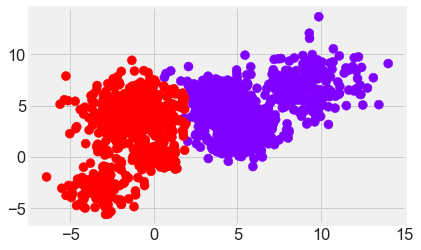

In [35]:
plt.scatter(blob_array[:,0],blob_array[:,1], c=cluster.labels_, cmap='rainbow')

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [37]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [38]:
blob_array.shape

(1450, 2)

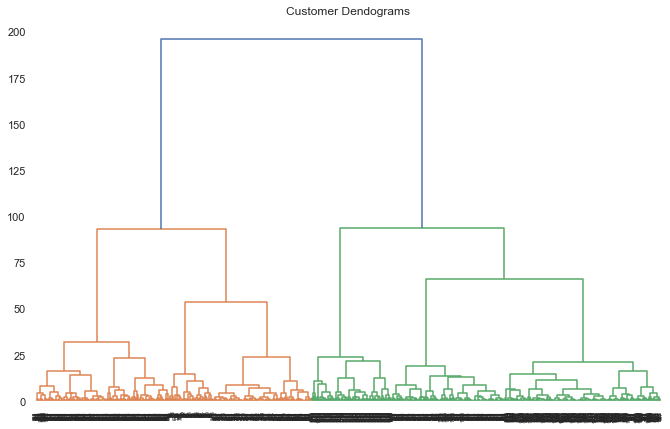

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(blob_array, method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(blob_array)

array([0, 0, 0, ..., 2, 3, 2], dtype=int64)

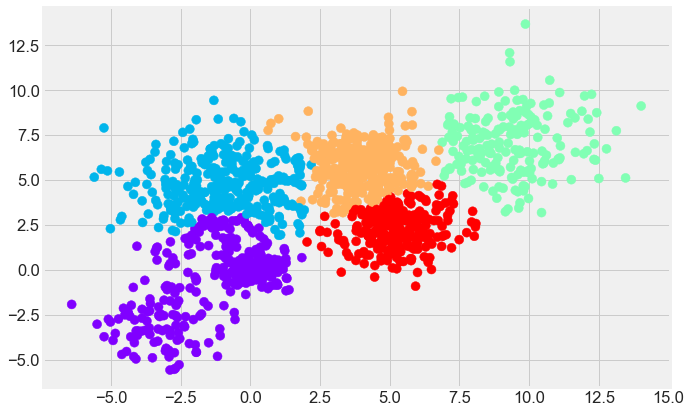

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(blob_array[:,0], blob_array[:,1], c=cluster.labels_, cmap='rainbow')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
blob_array = np.array(Multi_blob_Data)
blob_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [44]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(blob_array) 
distances,indices=nbrs.kneighbors(blob_array)

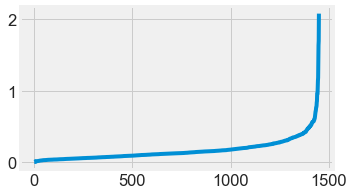

In [45]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances)
plt.show()

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(blob_array) 
labels = dbscan.labels_ 

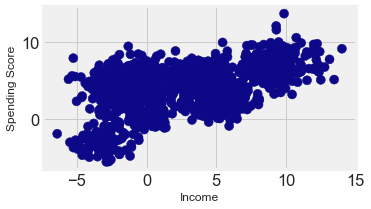

In [47]:
plt.scatter(blob_array[:, 0], blob_array[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Income") 
plt.ylabel("Spending Score") 
plt.show() #

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

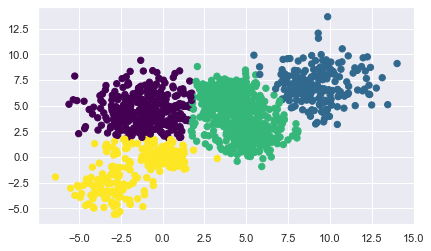

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(blob_array).predict(blob_array)
plt.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis');

In [50]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, blob_array, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(blob_array)

    
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    
    centers = kmeans.cluster_centers_
    radii = [cdist(blob_array[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

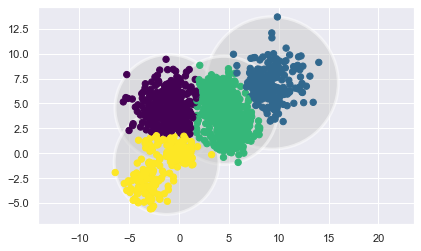

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, blob_array)


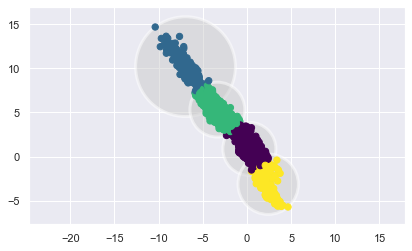

In [52]:
rng = np.random.RandomState(13)
X_stretched = np.dot(blob_array, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [53]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(blob_array)
labels = gmm.predict(blob_array)
plt.scatter(blob_array[:, 0], blob_array[:, 1], c=labels, s=40, cmap='viridis');

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\mixture\__init__.py)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [53]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 